In [6]:
! pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('agri_data.csv')
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [9]:

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")


In [10]:
# Step 2: Drop unnamed/empty columns
df = df.loc[:, ~df.columns.str.contains('^unnamed')]


In [11]:

df.fillna(0, inplace=True)


In [12]:

df.to_csv('cleaned_agri_data.csv', index=False)
print("✅ Cleaned data saved successfully.")


✅ Cleaned data saved successfully.


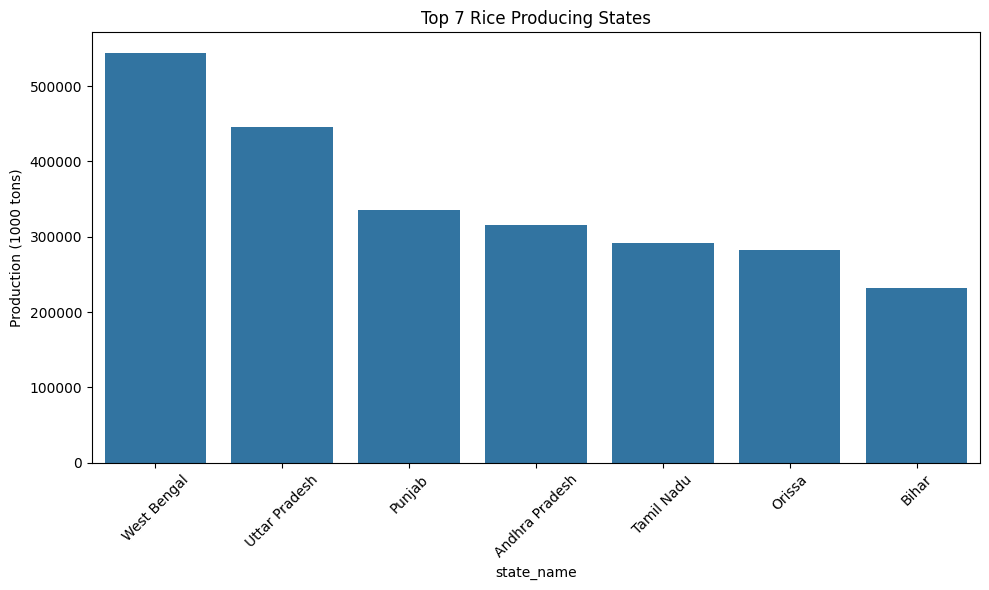

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('cleaned_agri_data.csv')

# EDA 1: Top 7 Rice Producing States
top_rice = df.groupby('state_name')['rice_production_1000_tons'].sum().nlargest(7)
plt.figure(figsize=(10,6))
sns.barplot(x=top_rice.index, y=top_rice.values)
plt.title('Top 7 Rice Producing States')
plt.ylabel('Production (1000 tons)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

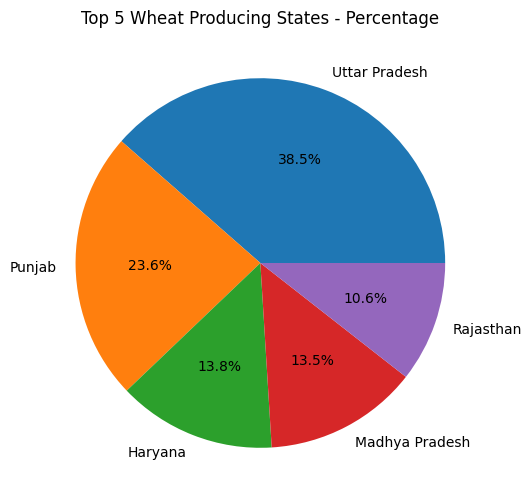

In [14]:
top_wheat = df.groupby('state_name')['wheat_production_1000_tons'].sum().nlargest(5)
plt.figure(figsize=(6,6))
plt.pie(top_wheat.values, labels=top_wheat.index, autopct='%1.1f%%')
plt.title('Top 5 Wheat Producing States - Percentage')
plt.show()


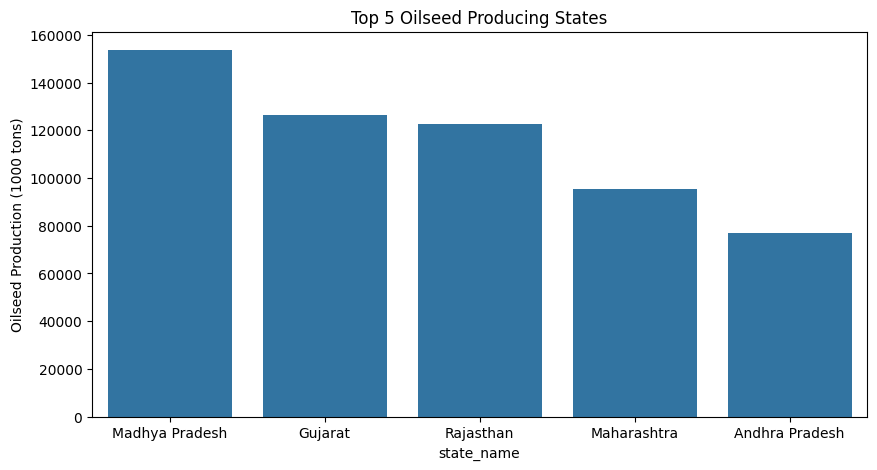

In [15]:
top_oil = df.groupby('state_name')['oilseeds_production_1000_tons'].sum().nlargest(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_oil.index, y=top_oil.values)
plt.title('Top 5 Oilseed Producing States')
plt.ylabel('Oilseed Production (1000 tons)')
plt.show()

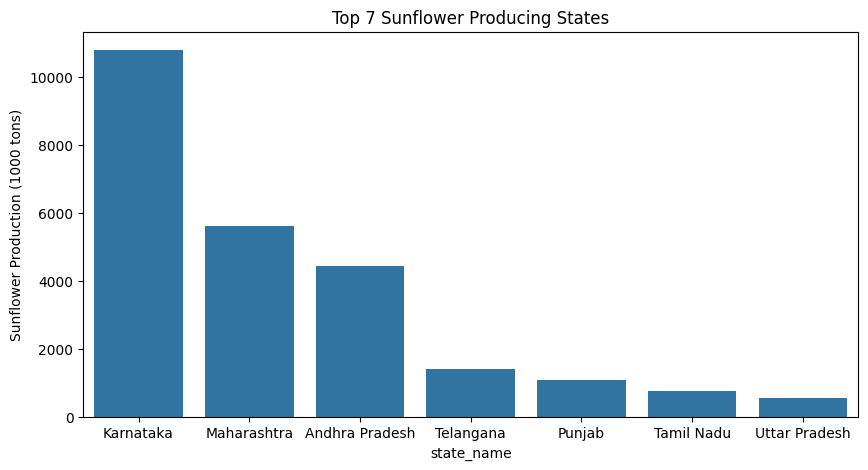

In [16]:
top_sun = df.groupby('state_name')['sunflower_production_1000_tons'].sum().nlargest(7)
plt.figure(figsize=(10,5))
sns.barplot(x=top_sun.index, y=top_sun.values)
plt.title('Top 7 Sunflower Producing States')
plt.ylabel('Sunflower Production (1000 tons)')
plt.show()

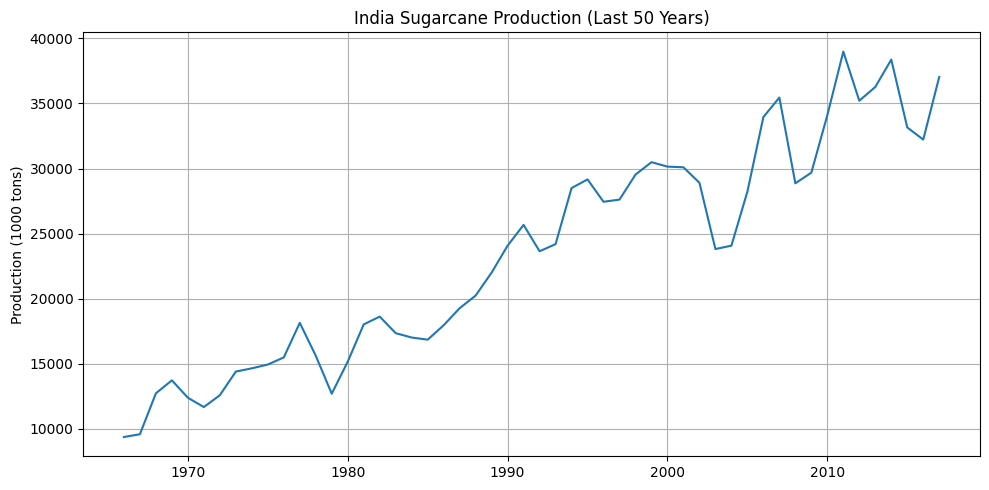

In [17]:
sugar = df.groupby('year')['sugarcane_production_1000_tons'].sum()
plt.figure(figsize=(10,5))
plt.plot(sugar.index, sugar.values)
plt.title('India Sugarcane Production (Last 50 Years)')
plt.ylabel('Production (1000 tons)')
plt.grid(True)
plt.tight_layout()
plt.show()

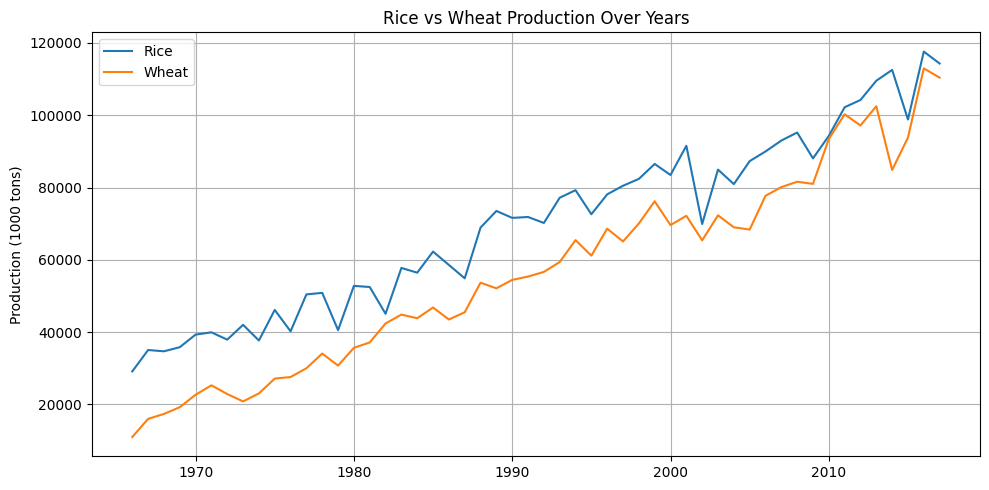

In [18]:
rice = df.groupby('year')['rice_production_1000_tons'].sum()
wheat = df.groupby('year')['wheat_production_1000_tons'].sum()
plt.figure(figsize=(10,5))
plt.plot(rice.index, rice.values, label='Rice')
plt.plot(wheat.index, wheat.values, label='Wheat')
plt.title('Rice vs Wheat Production Over Years')
plt.ylabel('Production (1000 tons)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

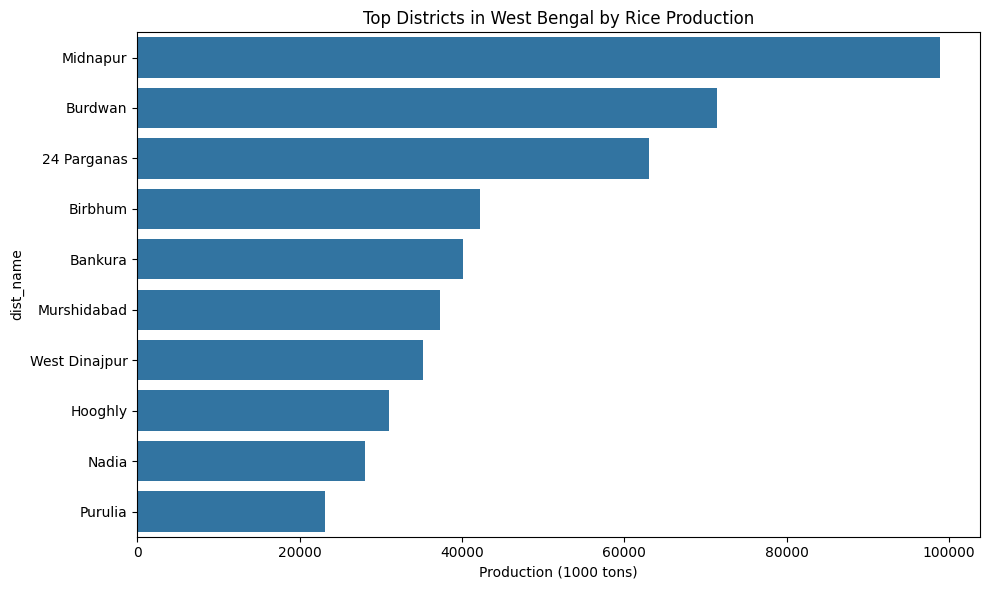

In [19]:
wb = df[df['state_name'] == 'West Bengal']
wb_rice = wb.groupby('dist_name')['rice_production_1000_tons'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=wb_rice.values, y=wb_rice.index)
plt.title('Top Districts in West Bengal by Rice Production')
plt.xlabel('Production (1000 tons)')
plt.tight_layout()
plt.show()

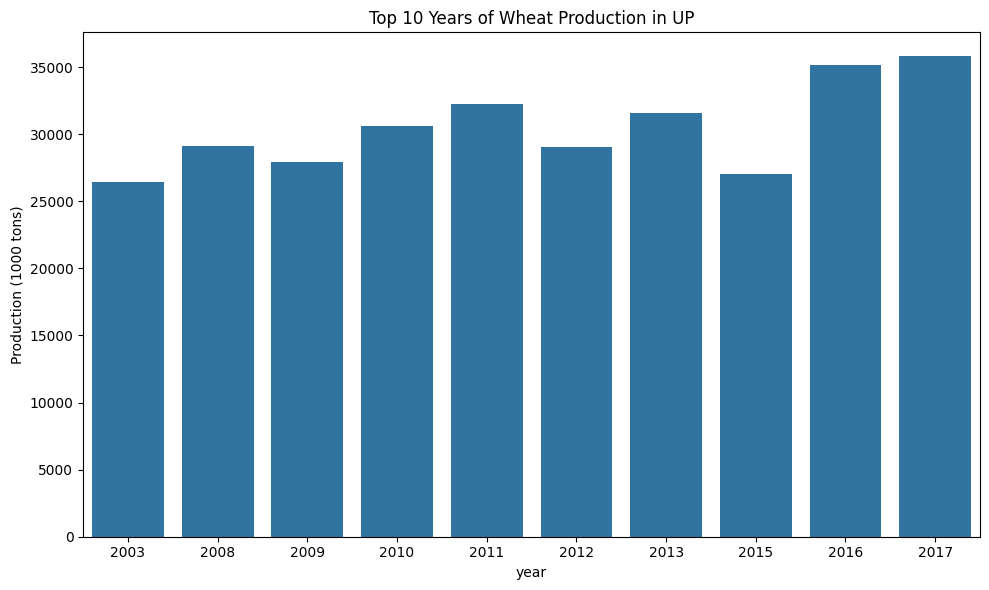

In [20]:
up = df[df['state_name'] == 'Uttar Pradesh']
up_wheat = up.groupby('year')['wheat_production_1000_tons'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=up_wheat.index, y=up_wheat.values)
plt.title('Top 10 Years of Wheat Production in UP')
plt.ylabel('Production (1000 tons)')
plt.tight_layout()
plt.show()


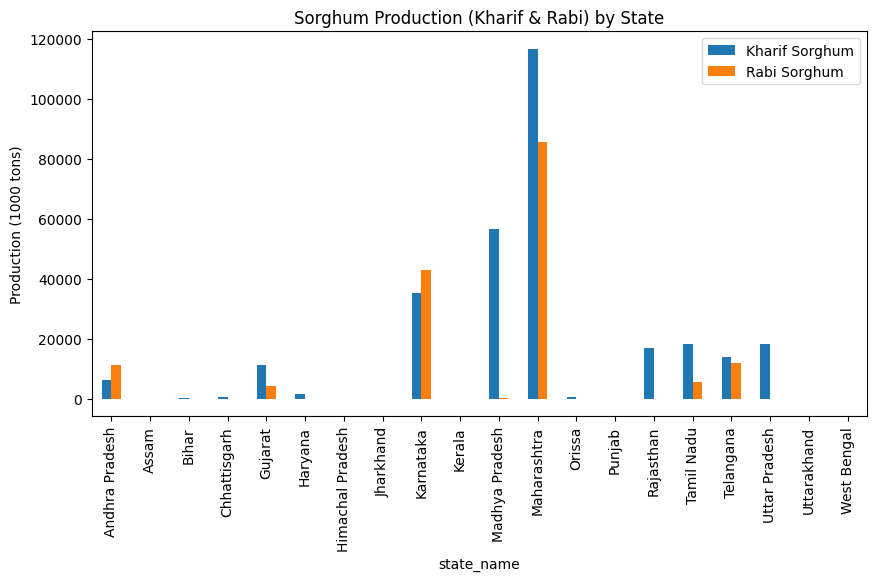

In [21]:
kharif_sorghum = df.groupby("state_name")["kharif_sorghum_production_1000_tons"].sum()
rabi_sorghum = df.groupby("state_name")["rabi_sorghum_production_1000_tons"].sum()

pd.DataFrame({
    "Kharif Sorghum": kharif_sorghum,
    "Rabi Sorghum": rabi_sorghum
}).plot(kind="bar", figsize=(10,5), title="Sorghum Production (Kharif & Rabi) by State")
plt.ylabel("Production (1000 tons)")
plt.show()


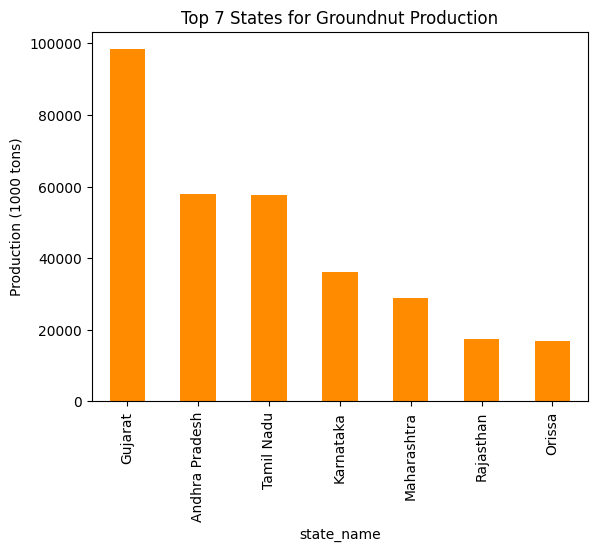

In [22]:
top_groundnut = df.groupby("state_name")["groundnut_production_1000_tons"].sum().nlargest(7)
top_groundnut.plot(kind="bar", color="darkorange", title="Top 7 States for Groundnut Production")
plt.ylabel("Production (1000 tons)")
plt.show()


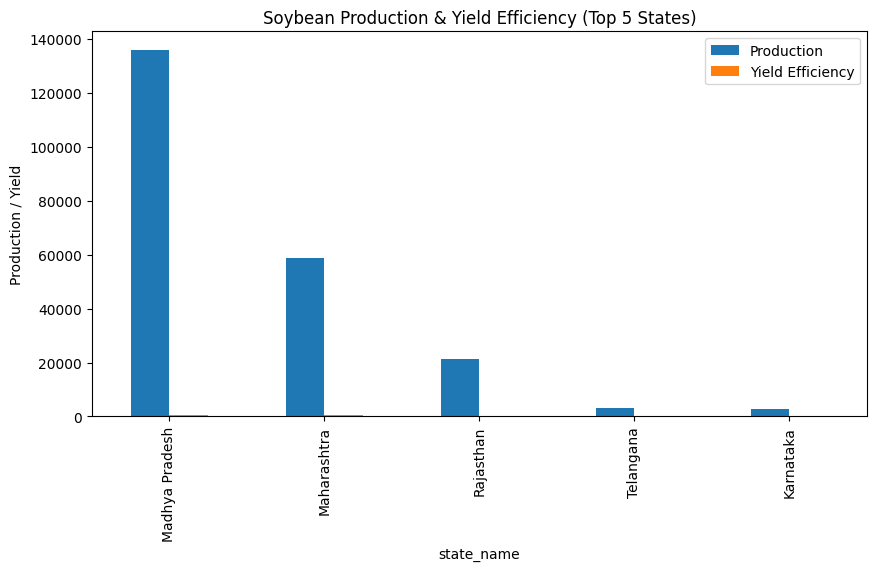

In [23]:
soybean_prod = df.groupby("state_name")["soyabean_production_1000_tons"].sum().nlargest(5)
soybean_yield = df.groupby("state_name")["soyabean_yield_kg_per_ha"].mean().loc[soybean_prod.index]

pd.DataFrame({
    "Production": soybean_prod,
    "Yield Efficiency": soybean_yield
}).plot(kind="bar", figsize=(10,5), title="Soybean Production & Yield Efficiency (Top 5 States)")
plt.ylabel("Production / Yield")
plt.show()


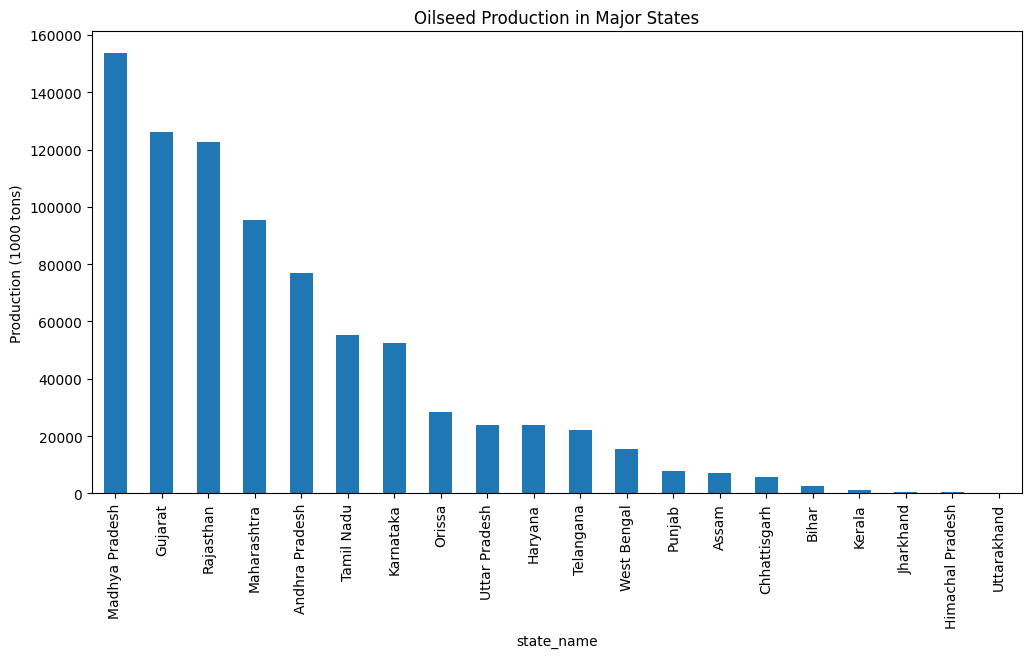

In [24]:
oilseed_states = df.groupby("state_name")["oilseeds_production_1000_tons"].sum().sort_values(ascending=False)
oilseed_states.plot(kind="bar", figsize=(12,6), title="Oilseed Production in Major States")
plt.ylabel("Production (1000 tons)")
plt.show()


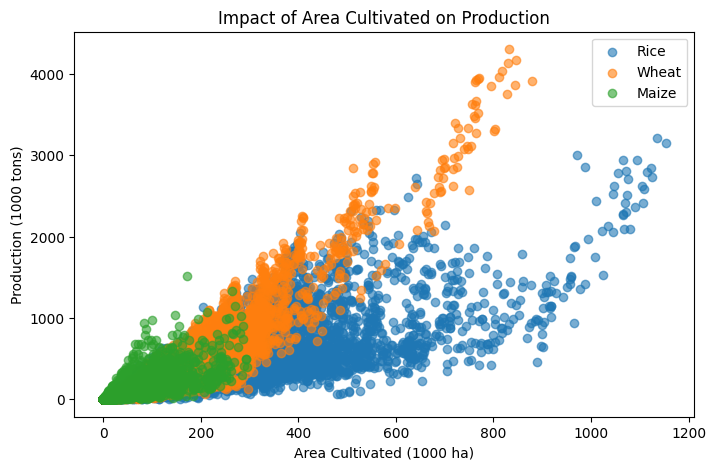

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df["rice_area_1000_ha"], df["rice_production_1000_tons"], label="Rice", alpha=0.6)
plt.scatter(df["wheat_area_1000_ha"], df["wheat_production_1000_tons"], label="Wheat", alpha=0.6)
plt.scatter(df["maize_area_1000_ha"], df["maize_production_1000_tons"], label="Maize", alpha=0.6)
plt.xlabel("Area Cultivated (1000 ha)")
plt.ylabel("Production (1000 tons)")
plt.title("Impact of Area Cultivated on Production")
plt.legend()
plt.show()


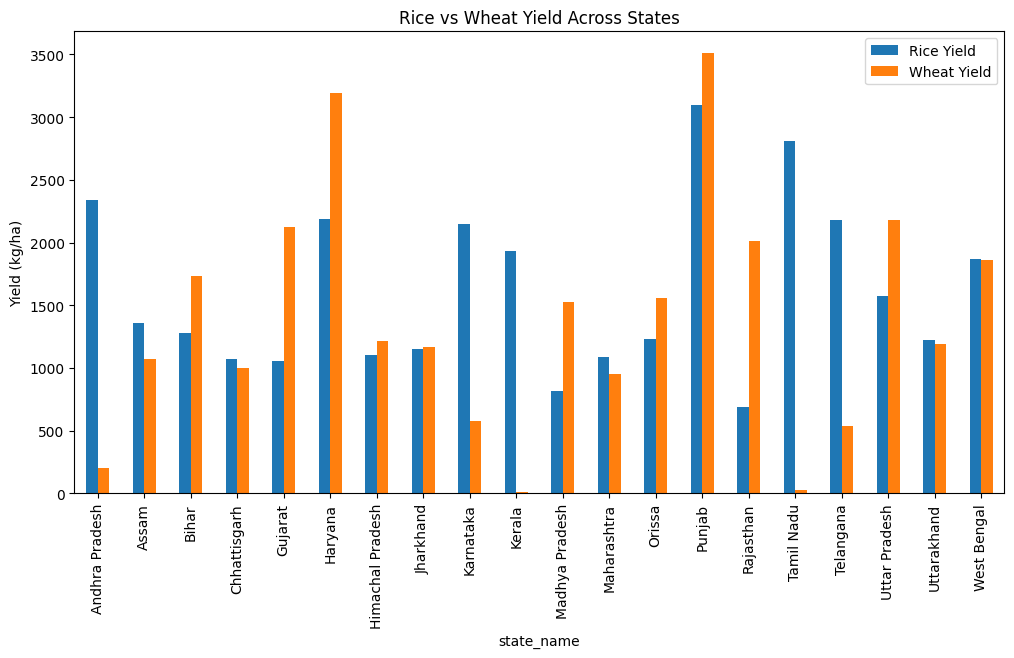

In [26]:
rice_yield = df.groupby("state_name")["rice_yield_kg_per_ha"].mean()
wheat_yield = df.groupby("state_name")["wheat_yield_kg_per_ha"].mean()

pd.DataFrame({
    "Rice Yield": rice_yield,
    "Wheat Yield": wheat_yield
}).plot(kind="bar", figsize=(12,6), title="Rice vs Wheat Yield Across States")
plt.ylabel("Yield (kg/ha)")
plt.show()


In [27]:
! pip install mysql-connector-python



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pymysql



In [29]:
import pymysql

conn = pymysql.connect(
    host="localhost",
    user="root",
    password="123456789"
)
cursor = conn.cursor()

cursor.execute("CREATE DATABASE IF NOT EXISTS agriculture_db;")

print("✅ Database created successfully!")

cursor.execute("USE agriculture_db")


✅ Database created successfully!


0

In [30]:
create_table = """
CREATE TABLE IF NOT EXISTS agri_data (
    dist_code INT,
    year INT,
    state_code INT,
    state_name VARCHAR(100),
    dist_name VARCHAR(100),
    rice_area_1000_ha FLOAT,
    rice_production_1000_tons FLOAT,
    rice_yield_kg_per_ha FLOAT,
    wheat_area_1000_ha FLOAT,
    wheat_production_1000_tons FLOAT,
    wheat_yield_kg_per_ha FLOAT,
    kharif_sorghum_area_1000_ha FLOAT,
    kharif_sorghum_production_1000_tons FLOAT,
    kharif_sorghum_yield_kg_per_ha FLOAT,
    rabi_sorghum_area_1000_ha FLOAT,
    rabi_sorghum_production_1000_tons FLOAT,
    rabi_sorghum_yield_kg_per_ha FLOAT,
    sorghum_area_1000_ha FLOAT,
    sorghum_production_1000_tons FLOAT,
    sorghum_yield_kg_per_ha FLOAT,
    pearl_millet_area_1000_ha FLOAT,
    pearl_millet_production_1000_tons FLOAT,
    pearl_millet_yield_kg_per_ha FLOAT,
    maize_area_1000_ha FLOAT,
    maize_production_1000_tons FLOAT,
    maize_yield_kg_per_ha FLOAT,
    finger_millet_area_1000_ha FLOAT,
    finger_millet_production_1000_tons FLOAT,
    finger_millet_yield_kg_per_ha FLOAT,
    barley_area_1000_ha FLOAT,
    barley_production_1000_tons FLOAT,
    barley_yield_kg_per_ha FLOAT,
    chickpea_area_1000_ha FLOAT,
    chickpea_production_1000_tons FLOAT,
    chickpea_yield_kg_per_ha FLOAT,
    pigeonpea_area_1000_ha FLOAT,
    pigeonpea_production_1000_tons FLOAT,
    pigeonpea_yield_kg_per_ha FLOAT,
    minor_pulses_area_1000_ha FLOAT,
    minor_pulses_production_1000_tons FLOAT,
    minor_pulses_yield_kg_per_ha FLOAT,
    groundnut_area_1000_ha FLOAT,
    groundnut_production_1000_tons FLOAT,
    groundnut_yield_kg_per_ha FLOAT,
    sesamum_area_1000_ha FLOAT,
    sesamum_production_1000_tons FLOAT,
    sesamum_yield_kg_per_ha FLOAT,
    rapeseed_and_mustard_area_1000_ha FLOAT,
    rapeseed_and_mustard_production_1000_tons FLOAT,
    rapeseed_and_mustard_yield_kg_per_ha FLOAT,
    safflower_area_1000_ha FLOAT,
    safflower_production_1000_tons FLOAT,
    safflower_yield_kg_per_ha FLOAT,
    castor_area_1000_ha FLOAT,
    castor_production_1000_tons FLOAT,
    castor_yield_kg_per_ha FLOAT,
    linseed_area_1000_ha FLOAT,
    linseed_production_1000_tons FLOAT,
    linseed_yield_kg_per_ha FLOAT,
    sunflower_area_1000_ha FLOAT,
    sunflower_production_1000_tons FLOAT,
    sunflower_yield_kg_per_ha FLOAT,
    soyabean_area_1000_ha FLOAT,
    soyabean_production_1000_tons FLOAT,
    soyabean_yield_kg_per_ha FLOAT,
    oilseeds_area_1000_ha FLOAT,
    oilseeds_production_1000_tons FLOAT,
    oilseeds_yield_kg_per_ha FLOAT,
    sugarcane_area_1000_ha FLOAT,
    sugarcane_production_1000_tons FLOAT,
    sugarcane_yield_kg_per_ha FLOAT,
    cotton_area_1000_ha FLOAT,
    cotton_production_1000_tons FLOAT,
    cotton_yield_kg_per_ha FLOAT,
    fruits_area_1000_ha FLOAT,
    vegetables_area_1000_ha FLOAT,
    fruits_and_vegetables_area_1000_ha FLOAT,
    potatoes_area_1000_ha FLOAT,
    onion_area_1000_ha FLOAT,
    fodder_area_1000_ha FLOAT
);
"""
cursor.execute(create_table)
print("✅ Table created successfully with all 80 columns.")


✅ Table created successfully with all 80 columns.


In [31]:
columns = ",".join(df.columns)
placeholders = ",".join(["%s"] * len(df.columns))

for row in df.itertuples(index=False, name=None):
    cursor.execute(f"""
        INSERT INTO agri_data ({columns})
        VALUES ({placeholders})
    """, row)


In [32]:
conn.commit()
print("✅ Data inserted successfully!")


✅ Data inserted successfully!


In [15]:
query1 = """
SELECT state_name, SUM(rice_production_1000_tons) AS total_rice
FROM agri_data
WHERE year >= 2010
GROUP BY state_name
ORDER BY total_rice DESC
LIMIT 5;
"""
cursor.execute(query1)
for r in cursor.fetchall():
    print(r)


('West Bengal', 120964.23946762085)
('Uttar Pradesh', 110014.39974390715)
('Punjab', 92967.99981689453)
('Andhra Pradesh', 62971.01971435547)
('Orissa', 62002.11023712158)


In [16]:
query2 = """
SELECT state_name, year, AVG(wheat_yield_kg_per_ha) as avg_yield
FROM agri_data
GROUP BY state_name, year
ORDER BY state_name, year;
"""
cursor.execute(query2)
for r in cursor.fetchall():
    print(r)


('Andhra Pradesh', 1966, 128.41727378151634)
('Andhra Pradesh', 1967, 34.632726495916195)
('Andhra Pradesh', 1968, 146.83181762695312)
('Andhra Pradesh', 1969, 174.28272732821378)
('Andhra Pradesh', 1970, 549.5863647460938)
('Andhra Pradesh', 1971, 258.95272549715907)
('Andhra Pradesh', 1972, 341.99181574041194)
('Andhra Pradesh', 1973, 199.85636208274147)
('Andhra Pradesh', 1974, 287.4454539905895)
('Andhra Pradesh', 1975, 554.4754527698864)
('Andhra Pradesh', 1976, 620.3209117542614)
('Andhra Pradesh', 1977, 272.77999600497157)
('Andhra Pradesh', 1978, 226.76727294921875)
('Andhra Pradesh', 1979, 196.9700039950284)
('Andhra Pradesh', 1980, 136.36363636363637)
('Andhra Pradesh', 1981, 204.54545454545453)
('Andhra Pradesh', 1982, 270.5627274946733)
('Andhra Pradesh', 1983, 146.5563631924716)
('Andhra Pradesh', 1984, 131.38545365767047)
('Andhra Pradesh', 1985, 164.93545254794034)
('Andhra Pradesh', 1986, 227.27272727272728)
('Andhra Pradesh', 1987, 111.68818248401989)
('Andhra Pradesh'

In [17]:
query3 = """
SELECT year, SUM(sugarcane_production_1000_tons) as total_sugarcane
FROM agri_data
GROUP BY year
ORDER BY year;
"""
cursor.execute(query3)
for r in cursor.fetchall():
    print(r)


(1966, 9361.709998862818)
(1967, 9574.380004607141)
(1968, 12720.70000594668)
(1969, 13719.570049449801)
(1970, 12381.599979959428)
(1971, 11664.00997486338)
(1972, 12573.279969953)
(1973, 14392.61997083947)
(1974, 14640.449968140572)
(1975, 14931.260005729273)
(1976, 15480.119930697605)
(1977, 18136.919902162626)
(1978, 15610.470023171976)
(1979, 12689.55999215506)
(1980, 15153.069944754243)
(1981, 18017.940010171384)
(1982, 18617.77990417555)
(1983, 17344.320024671033)
(1984, 17009.600076342)
(1985, 16843.799953607842)
(1986, 17952.700082499534)
(1987, 19262.10002026148)
(1988, 20234.530068492517)
(1989, 22000.56006444432)
(1990, 24073.069900384173)
(1991, 25666.70012656413)
(1992, 23642.97993181646)
(1993, 24187.26989717409)
(1994, 28496.589994220063)
(1995, 29164.69003856182)
(1996, 27444.290075656027)
(1997, 27612.420142032206)
(1998, 29533.069841487333)
(1999, 30489.41995384544)
(2000, 30147.270238278434)
(2001, 30095.869952127337)
(2002, 28905.089922316372)
(2003, 23810.48997196

In [18]:
query4 = """
SELECT dist_name, MAX(soyabean_yield_kg_per_ha) as max_yield
FROM agri_data
GROUP BY dist_name
ORDER BY max_yield DESC
LIMIT 5;
"""
cursor.execute(query4)
for r in cursor.fetchall():
    print(r)


('Pune', 3884.06)
('East Godavari', 3000.0)
('Vadodara / Baroda', 3000.0)
('Guntur', 2854.46)
('Shimla', 2800.0)


In [19]:
query5 = """
SELECT state_name, SUM(cotton_production_1000_tons) as total_cotton
FROM agri_data
WHERE year >= (SELECT MAX(year)-5 FROM agri_data)
GROUP BY state_name
ORDER BY total_cotton DESC
LIMIT 5;
"""
cursor.execute(query5)
for r in cursor.fetchall():
    print(r)


('Gujarat', 8501.73002576828)
('Maharashtra', 7126.089944506064)
('Telangana', 4329.569992780685)
('Andhra Pradesh', 2135.8599911406636)
('Haryana', 1917.6599832773209)


In [7]:
cursor.execute("USE agriculture_db")

0

In [4]:
query6 = """
SELECT state_name,
       ROUND(AVG(barley_yield_kg_per_ha), 2) AS avg_barley_yield
FROM agri_data
GROUP BY state_name
ORDER BY avg_barley_yield DESC;
"""

cursor.execute(query6)
result = cursor.fetchall()

for row in result:
    print(row)

('Rajasthan', 1788.99)
('Haryana', 1747.83)
('Uttar Pradesh', 1626.35)
('Punjab', 1431.61)
('Himachal Pradesh', 1181.02)
('Uttarakhand', 961.17)
('Madhya Pradesh', 941.18)
('Bihar', 913.31)
('West Bengal', 484.66)
('Chhattisgarh', 475.7)
('Jharkhand', 464.7)
('Gujarat', 70.09)
('Maharashtra', 11.38)
('Andhra Pradesh', 0.0)
('Telangana', 0.0)
('Karnataka', 0.0)
('Tamil Nadu', 0.0)
('Assam', 0.0)
('Kerala', 0.0)
('Orissa', 0.0)


In [33]:
query7 = """
SELECT year,
       SUM(maize_production_1000_tons) AS total_maize_production
FROM agri_data
WHERE year >= YEAR(CURDATE()) - 30
GROUP BY year
ORDER BY year ASC;
"""
cursor.execute(query7)
result = cursor.fetchall()
for row in result:
    print(row)

(1995, 17474.98002352938)
(1996, 19673.559929713607)
(1997, 20751.79999604076)
(1998, 20650.08004597947)
(1999, 21537.560017239302)
(2000, 23331.759939868003)
(2001, 24677.999998137355)
(2002, 20966.22003987804)
(2003, 27898.64013843611)
(2004, 26250.09997069463)
(2005, 29107.719991791993)
(2006, 28444.280177455395)
(2007, 37816.80003356561)
(2008, 36413.02003919333)
(2009, 32051.380084190518)
(2010, 44241.30015021935)
(2011, 43729.35983877629)
(2012, 45822.19994568825)
(2013, 52604.00008536875)
(2014, 49465.620103001595)
(2015, 44236.28014181927)
(2016, 54365.31995844841)
(2017, 65450.05976596102)


In [ ]:
query8 = """
SELECT state_name,
       SUM(oilseeds_production_1000_tons) AS total_oilseed_production
FROM agri_data
WHERE year >= YEAR(CURDATE()) - 10
GROUP BY state_name
ORDER BY total_oilseed_production DESC;
"""
cursor.execute(query8)
result = cursor.fetchall()
for row in result:
    print(row)


('Andhra Pradesh', 15096.21997833252)
('Rajasthan', 11022.299911499023)
('Madhya Pradesh', 10279.059911727905)
('Gujarat', 6992.10001039505)
('Haryana', 5942.399978637695)
('Maharashtra', 4332.24005317688)
('Orissa', 3320.479995727539)
('Tamil Nadu', 1863.9600063301623)
('Telangana', 955.2400102615356)
('Assam', 424.15999460220337)
('Chhattisgarh', 260.55999755859375)
('Punjab', 118.77999877929688)
('Jharkhand', 63.28000009059906)
('Uttarakhand', 55.21999955177307)
('Himachal Pradesh', 11.639999747276306)
('Uttar Pradesh', 4.239999771118164)
('Karnataka', 0.0)
('Kerala', 0.0)
('West Bengal', 0.0)
('Bihar', 0.0)
